## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
    -Relationship between lunch and test scores
    -Relationship between parental ed and test score
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [23]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
df['overall_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
#simple average score
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


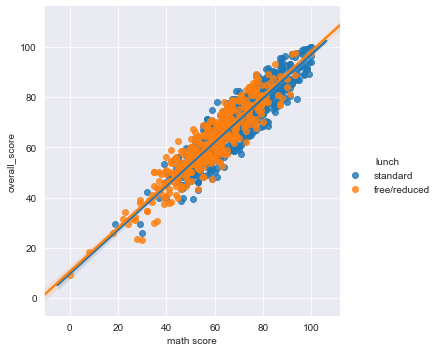

In [49]:
sns.lmplot(data = df, x='math score', y='overall_score', hue='lunch');
#If you focus on that upper quadrant, it appears that students recieving the free/reduced lunch
#aren't reaching perfect scores.

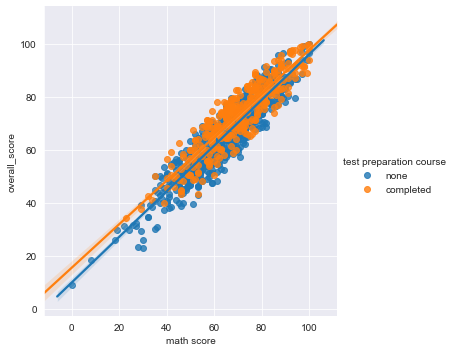

In [59]:
sns.lmplot(data = df, x='math score', y='overall_score', hue='test preparation course');
#Probably a good idea to do the prep course.

In [50]:
# Perform an Exploration of Math Score
df.corr()['overall_score'].sort_values(ascending=False)
# Idea - assign values to parental education level, then see correlation and plot it out
# Reading score has hightest correlation, math has the lowest.

overall_score    1.000000
reading score    0.970331
writing score    0.965667
math score       0.918746
Name: overall_score, dtype: float64

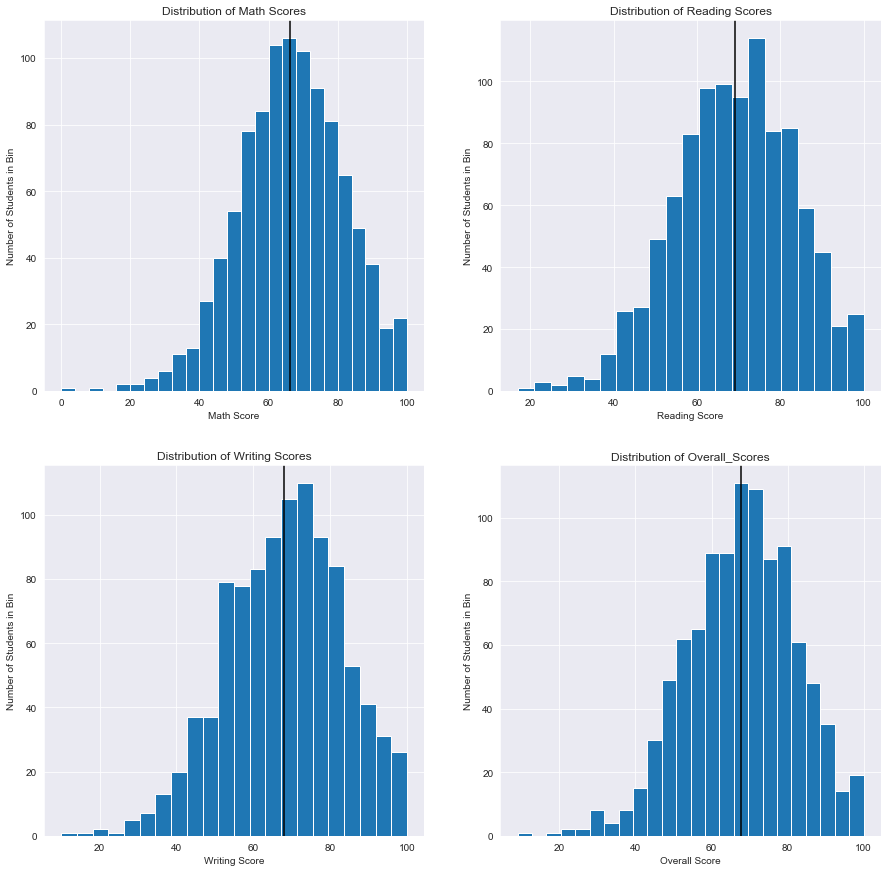

In [58]:
new_figure = plt.figure(figsize=(15,15))

ax = new_figure.add_subplot(221)
ax2 = new_figure.add_subplot(222)
ax3 = new_figure.add_subplot(223)
ax4 = new_figure.add_subplot(224)

ax.hist(df['math score'], bins='auto')
ax.set_title('Distribution of Math Scores')
ax.set_xlabel('Math Score')
ax.set_ylabel('Number of Students in Bin')
ax.axvline(df['math score'].mean(), color='black');

ax2.hist(df['reading score'], bins='auto')
ax2.set_title('Distribution of Reading Scores')
ax2.set_xlabel('Reading Score')
ax2.set_ylabel('Number of Students in Bin')
ax2.axvline(df['reading score'].mean(), color='black');

ax3.hist(df['writing score'], bins='auto')
ax3.set_title('Distribution of Writing Scores')
ax3.set_xlabel('Writing Score')
ax3.set_ylabel('Number of Students in Bin')
ax3.axvline(df['writing score'].mean(), color='black');

ax4.hist(df['overall_score'], bins='auto')
ax4.set_title('Distribution of Overall_Scores')
ax4.set_xlabel('Overall Score')
ax4.set_ylabel('Number of Students in Bin')
ax4.axvline(df['overall_score'].mean(), color='black');


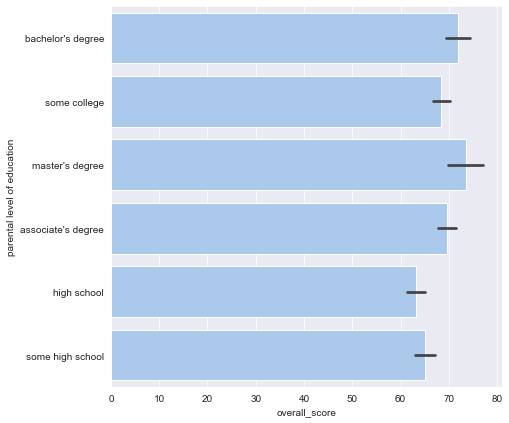

In [67]:
f, ax = plt.subplots(figsize=(7,7))
sns.set_color_codes("pastel")
sns.barplot(x="overall_score", y="parental level of education", data=df, color = 'b');